# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


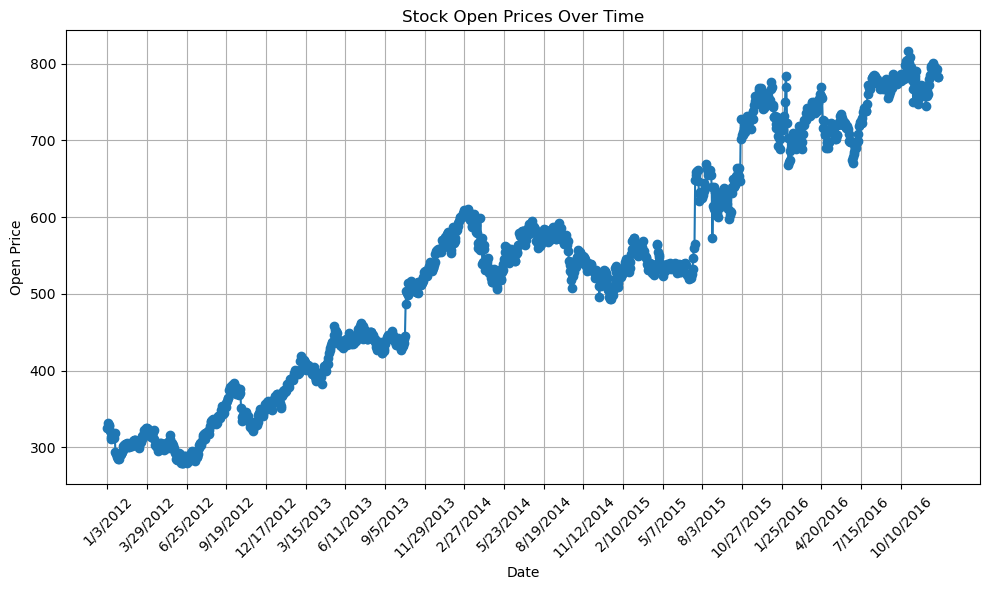

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_train['Date'], dataset_train['Open'], marker='o', linestyle='-')
plt.title('Stock Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
n = 60
plt.xticks(range(0, len(dataset_train['Date']), n), dataset_train['Date'].iloc[::n], rotation=45)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)  # Add gridlines
plt.show()

### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [16]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


### Initialising the RNN

In [24]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 

### Adding a second LSTM layer and some Dropout regularisation

In [26]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [28]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [29]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [33]:
from tensorflow.keras.optimizers import Adam


In [37]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [38]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 8s 6ms/sample - loss: 0.0486
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0060
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0057
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0042
Epoch 12/100
1198/1198 [====

1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0016
Epoch 90/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 91/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0017
Epoch 92/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0018
Epoch 93/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 94/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0014
Epoch 100/100
1198/1198 [==============================]

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [40]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


### Getting the predicted stock price of 2017

In [41]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\abdelFerdous\miniconda3\envs\myenv\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [49]:
for i in range(0, len(predicted_stock_price)):
    print(real_stock_price[i], "----------->" , predicted_stock_price[i])

[778.81] -----------> [778.072]
[788.36] -----------> [775.34064]
[786.08] -----------> [775.43964]
[795.26] -----------> [776.55945]
[806.4] -----------> [779.59033]
[807.86] -----------> [785.1116]
[805.] -----------> [790.1644]
[807.14] -----------> [792.18634]
[807.48] -----------> [792.4465]
[807.08] -----------> [792.0994]
[805.81] -----------> [791.7209]
[805.12] -----------> [791.37146]
[806.91] -----------> [791.2034]
[807.25] -----------> [791.8317]
[822.3] -----------> [792.9384]
[829.62] -----------> [797.62146]
[837.81] -----------> [804.4441]
[834.71] -----------> [811.69073]
[814.66] -----------> [815.61]
[796.86] -----------> [811.6241]


### Visualising the results

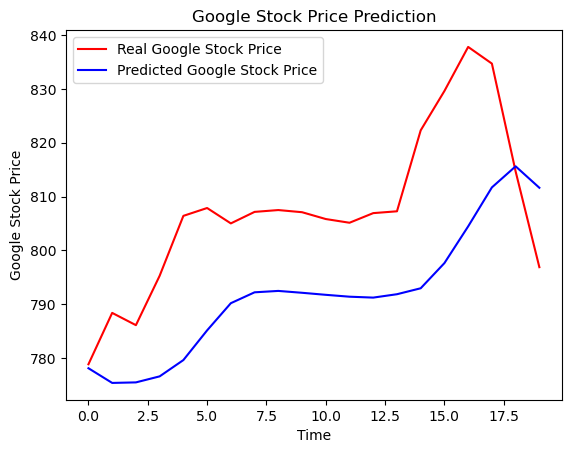

In [42]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()